In [1]:
import torch
import torchvision
from PIL import Image
import torchvision.transforms as Transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [2]:
def label_to_onehot(labels):
    label_tensor = []
    for l in labels:
        label_tensor.append(torch.tensor([0 if i!=l else 1 for i in range(1000)]))
    return torch.stack(label_tensor, 0)

def loss_fn(pred, target):
    loss = torch.mean(torch.sum(- target * torch.nn.functional.log_softmax(pred, dim=-1), 0))
    return loss

In [3]:
transform = Transforms.Compose([
                Transforms.Resize((224,224)),
                Transforms.ToTensor(),
                Transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                ])
dataset = torchvision.datasets.ImageNet('/mnt/ssd4/weiyang/Dataset/', split='val', download=False, transform = transform)

data_loader = DataLoader(dataset, shuffle=True, batch_size=8)

/mnt/ssd4/weiyang/anaconda/lib/python3.8/site-packages/torchvision/datasets/imagenet.py:50: RuntimeWarning: The use of the download flag is deprecated, since the dataset is no longer publicly accessible.
  warnings.warn(msg, RuntimeWarning)


In [4]:
model = torchvision.models.alexnet(pretrained=True)

In [297]:
model = torchvision.models.resnet18(pretrained=True)

In [5]:
idx = np.random.randint(0, 50000, 32)
#idx = [5000,5001,5002,36000,36001,21000,21001,8]

In [6]:
ground_truth = torch.stack([data_loader.dataset[i][0] for i in idx], 0)

gt_label = label_to_onehot([data_loader.dataset[i][1] for i in idx])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

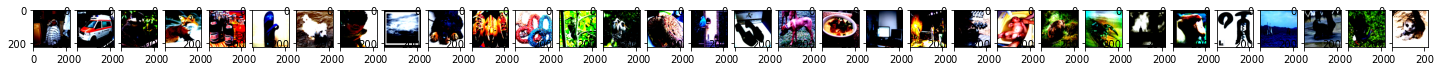

In [9]:
fig,axes = plt.subplots(1, 32, figsize=(25, 100))
for i in range(32):
    axes[i].imshow(ground_truth[i].permute(1,2,0))

In [18]:
gt_idx = set([data_loader.dataset[i][1] for i in idx])

In [11]:
model.eval()
loss = loss_fn(model(ground_truth), gt_label)
gt_grad = torch.autograd.grad(loss, model.parameters())
d_w = gt_grad[-2].permute(1,0)
dw = d_w.numpy()

In [12]:
torch.tensor([torch.sum(d_w[:,i]) for i in range(1000)]).topk(10, largest=False)

torch.return_types.topk(
values=tensor([-2.9300, -1.4345, -1.3790, -1.3628, -1.1914, -1.1861, -0.9766, -0.9590,
        -0.9464, -0.9302]),
indices=tensor([774, 538, 932, 124, 841, 252, 435, 930, 128, 782]))

In [13]:
u,s,v = np.linalg.svd(dw)
print(np.sum(s>1e-3))

29


In [15]:
idx_set = set(np.where(dw<0)[1])

In [45]:
np.linalg.matrix_rank(dw)

31